<a href="https://colab.research.google.com/github/cagBRT/Machine-Learning/blob/master/HierarchicalClustering4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/cemutku/k-means-and-hierarchical-clustering-implementation

In [4]:
!git clone -l -s https://github.com/cagBRT/Machine-Learning.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 720 (delta 5), reused 0 (delta 0), pack-reused 708
Receiving objects: 100% (720/720), 26.65 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (446/446), done.
/content/cloned-repo
 Admission_Predict.csv		       LogisticRegression_1.ipynb
 bank.csv			       Logistic_Regression_3.ipynb
 bank-full.csv			       Logistic_Regression_4.ipynb
 blue_line.jpg			       LogReg_Titanic.ipynb
 boston_housing.csv		       Mall_Customers.csv
 breast_cancer_data.csv		       NaiveBayesBernoulli.ipynb
 cardata.data			       NaiveBayesGaussian2.ipynb
 cows_and_wolves.txt		       NaiveBayesGaussian.ipynb
 diabetesML.ipynb		       NaiveBayesMultinomialNB2.ipynb
 dogOrMuffin.ipynb		       NaiveBayesMultinomialNB.ipynb
 fashion-mnist-sprite.png	       naiveBayes.png
 height_weight.csv		       pima_indians_diabetes.csv
 Hierarchical_Cluste

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [0]:
# Read and upload data
data = pd.read_csv("breast_cancer_data.csv")

In [7]:
# We don't need id and NaN data.
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


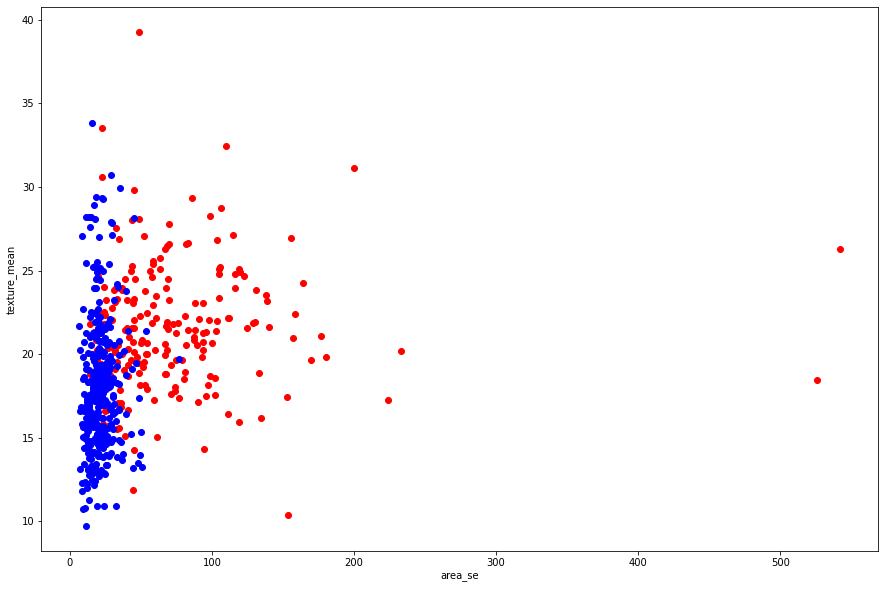

In [27]:
plt.figure(figsize = (15, 10))
plt.scatter(data["area_se"][data["diagnosis"] == "M"], data["texture_mean"][data["diagnosis"]== "M"], color = "red")
plt.scatter(data["area_se"][data["diagnosis"]  == "B"], data["texture_mean"][data["diagnosis"]== "B"], color = "blue")
plt.xlabel("area_se")
plt.ylabel("texture_mean")

plt.show()

In [8]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# For clustering we do not need labels. Because we'll identify the labels.
dataWithoutLabels = data.drop(["diagnosis"], axis = 1)
dataWithoutLabels.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
dataWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

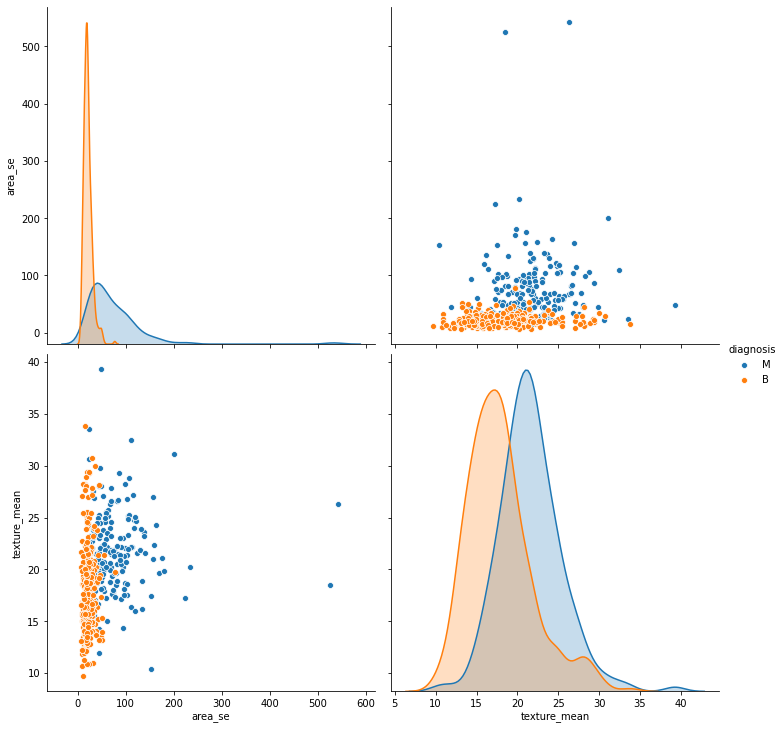

In [29]:
# radius_mean and texture_mean features will be used for clustering. Before clustering process let's check  how our data looks.
sns.pairplot(data.loc[:,['area_se','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

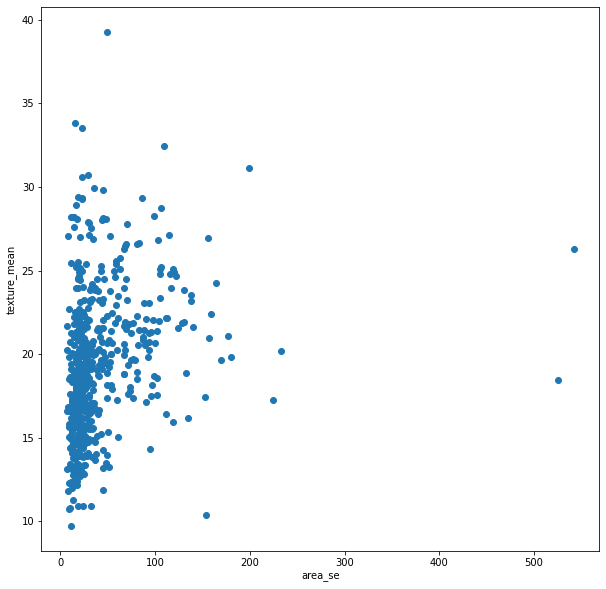

In [31]:
# Our data looks like below plot without diagnosis label

plt.figure(figsize = (10, 10))
plt.scatter(dataWithoutLabels["area_se"], dataWithoutLabels["texture_mean"])
plt.xlabel('area_se')
plt.ylabel('texture_mean')
plt.show()

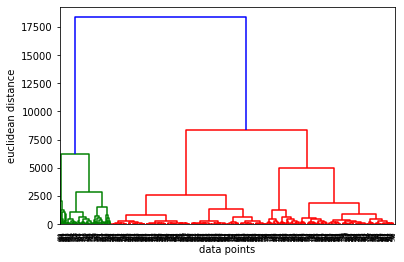

In [32]:
merg = linkage(dataWithoutLabels, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [0]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutLabels)
dataWithoutLabels["label"] = cluster

In [48]:
dataWithoutLabels.label.value_counts()

2    266
1    217
0     86
Name: label, dtype: int64

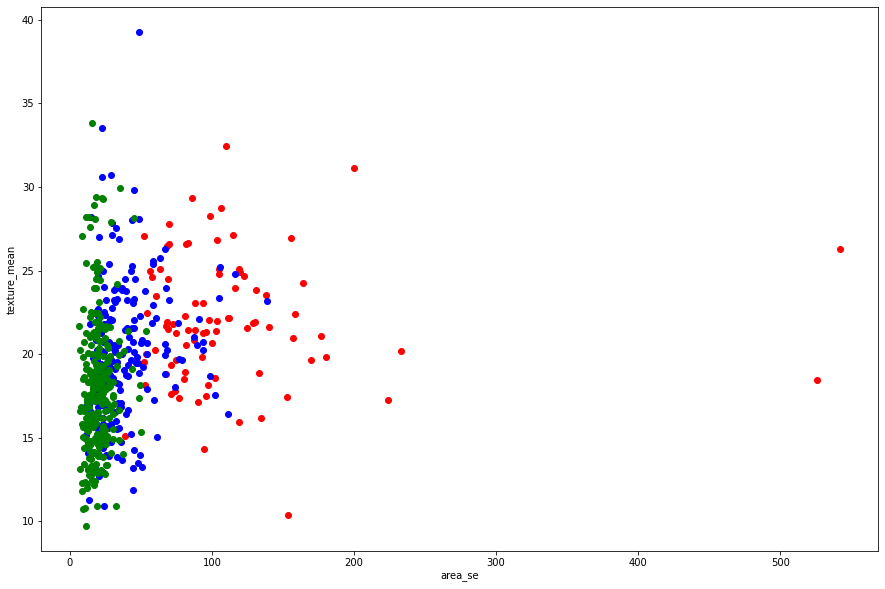

In [49]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["area_se"][dataWithoutLabels.label == 0], dataWithoutLabels["texture_mean"][dataWithoutLabels.label == 0], color = "red")
plt.scatter(dataWithoutLabels["area_se"][dataWithoutLabels.label == 1], dataWithoutLabels["texture_mean"][dataWithoutLabels.label == 1], color = "blue")
plt.scatter(dataWithoutLabels["area_se"][dataWithoutLabels.label == 2], dataWithoutLabels["texture_mean"][dataWithoutLabels.label == 2], color = "green")
plt.xlabel("area_se")
plt.ylabel("texture_mean")

plt.show()